<a href="https://www.kaggle.com/code/dataqueen22/waze-machinelearning?scriptVersionId=147884599" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I did this project as part of Coursera Google Advanced Data Analytics Course. For this XXXXXXbook, I referred and took help from the Exemplar code provided in the course work specifically to understand and identify hyper parameters for modeling.

**Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# This is the function that helps plot feature importance
from xgboost import plot_importance
# This module lets us save our models once we fit them.
import pickle

In [2]:
# Import dataset
data_path = '/kaggle/input/waze-dataset-to-predict-user-churn/waze_dataset.csv'
df0 = pd.read_csv(data_path)
df0.head()
df=df0.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


# EDA 
Using Data Visualizations to identify outliers.

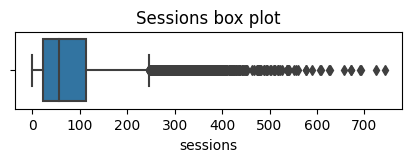

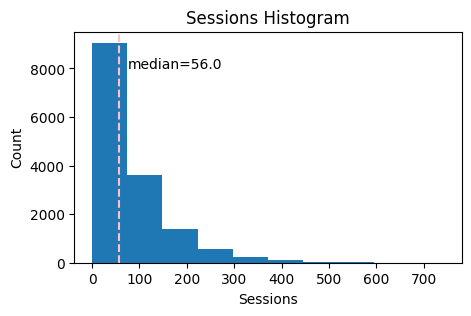

In [3]:
# Box plot for sessions variable
plt.figure(figsize=(5,1))
g = sns.boxplot(data=df, 
            x='sessions');
plt.title('Sessions box plot')
plt.show()

# Histogram
plt.figure(figsize=(5,3));
plt.hist(df['sessions'])
plt.xlabel('Sessions')
plt.ylabel('Count')
plt.title('Sessions Histogram')
median = df['sessions'].median()
plt.axvline(median, color='pink', linestyle='--')
plt.text(75,8000, 'median='+str(median), color='black')
plt.show();

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.


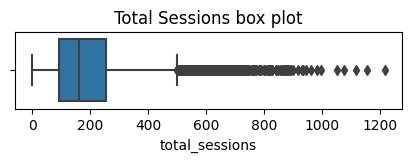

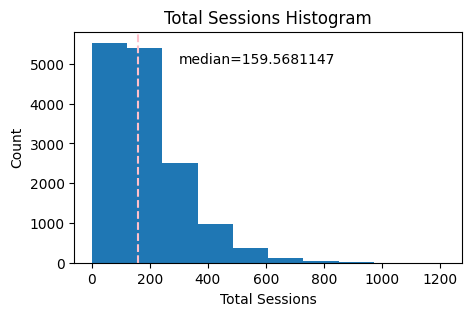

In [4]:
# Box plot for total_sessions
plt.figure(figsize=(5,1))
g = sns.boxplot(data=df, 
            x='total_sessions');
plt.title('Total Sessions box plot')
plt.show()

# Histogram
plt.figure(figsize=(5,3));
plt.hist(df['total_sessions'])
plt.xlabel('Total Sessions')
plt.ylabel('Count')
plt.title('Total Sessions Histogram')
median = df['total_sessions'].median()
plt.axvline(median, color='pink', linestyle='--')
plt.text(300,5000, 'median='+str(median), color='black')
plt.show();



The `total_sessions` is a right-skewed distribution.
The median total number of sessions is 159.6.

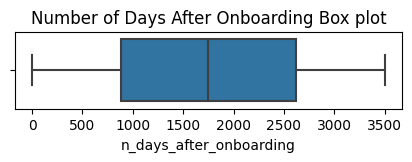

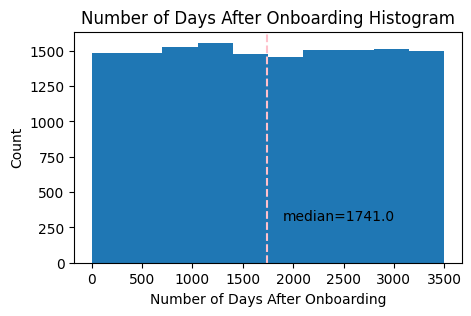

In [5]:
# Box plot for n_days_after_onboarding
plt.figure(figsize=(5,1))
g = sns.boxplot(data=df, 
            x='n_days_after_onboarding');
plt.title('Number of Days After Onboarding Box plot')
plt.show()

# Histogram
plt.figure(figsize=(5,3));
plt.hist(df['n_days_after_onboarding'])
plt.xlabel('Number of Days After Onboarding')
plt.ylabel('Count')
plt.title('Number of Days After Onboarding Histogram')
median = df['n_days_after_onboarding'].median()
plt.axvline(median, color='pink', linestyle='--')
plt.text(1900,300, 'median='+str(median), color='black')
plt.show();

Number of days since onboarding - A uniform distribution with values ranging from near-zero to ~3,500

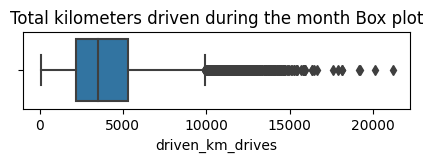

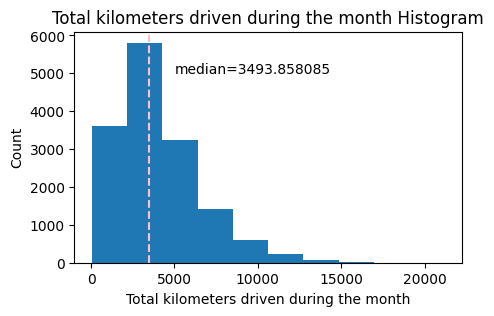

In [6]:
# Box plot for driven_km_drives
plt.figure(figsize=(5,1))
g = sns.boxplot(data=df, 
            x='driven_km_drives');
plt.title('Total kilometers driven during the month Box plot')
plt.show()

# Histogram
plt.figure(figsize=(5,3));
plt.hist(df['driven_km_drives'])
plt.xlabel('Total kilometers driven during the month')
plt.ylabel('Count')
plt.title('Total kilometers driven during the month Histogram')
median = df['driven_km_drives'].median()
plt.axvline(median, color='pink', linestyle='--')
plt.text(5000,5000, 'median='+str(median), color='black')
plt.show();

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,494 kilometers.

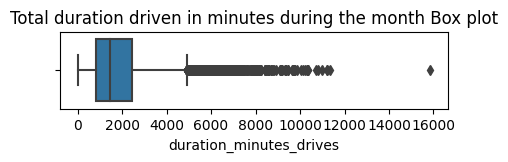

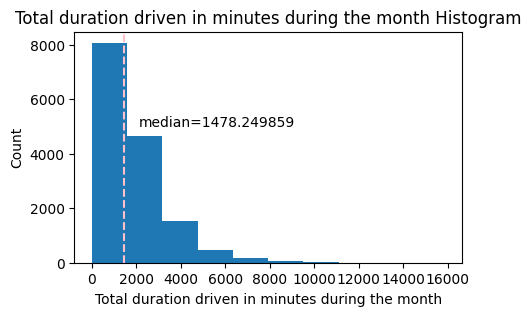

In [7]:
# Box plot for duration_minutes_drives
plt.figure(figsize=(5,1))
g = sns.boxplot(data=df, 
            x='duration_minutes_drives');
plt.title('Total duration driven in minutes during the month Box plot')
plt.show()

# Histogram
plt.figure(figsize=(5,3));
plt.hist(df['duration_minutes_drives'])
plt.xlabel('Total duration driven in minutes during the month')
plt.ylabel('Count')
plt.title('Total duration driven in minutes during the month Histogram')
median = df['duration_minutes_drives'].median()
plt.axvline(median, color='pink', linestyle='--')
plt.text(2100,5000, 'median='+str(median), color='black')
plt.show();

The `duration_minutes_drives` - skewed right tail. Half of the users ~1,478 minutes (\~25 hours)


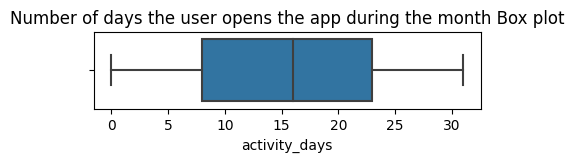

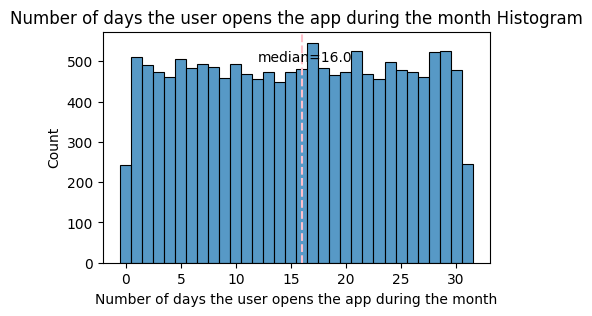

In [8]:
# Box plot for activity_days
plt.figure(figsize=(5,1))
g = sns.boxplot(data=df, 
            x='activity_days');
plt.title('Number of days the user opens the app during the month Box plot')
plt.show()

# Histogram
plt.figure(figsize=(5,3));
ax = sns.histplot(x=df['activity_days'],discrete=True)
plt.xlabel('Number of days the user opens the app during the month')
plt.title('Number of days the user opens the app during the month Histogram')
median = df['activity_days'].median()
plt.axvline(median, color='pink', linestyle='--')
plt.text(12,500, 'median='+str(median), color='black')
plt.show();


Last month - users opened the app a median of 16 times. 
The box plot - centered distribution. 
The histogram - uniform distribution of ~500 people opening the app on every day.
People who did not open the app at all = ~250 people 
People who opened the app every day ~250 
This is however, very different that the sessions distribution = Sessions distribution was rightly skewed.


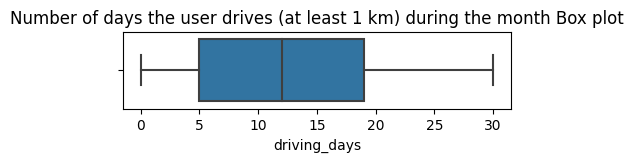

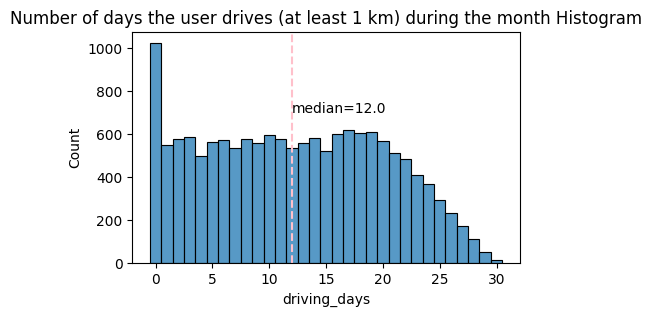

In [9]:
# Box plot for driving_days
plt.figure(figsize=(5,1))
g = sns.boxplot(data=df, 
            x='driving_days');
plt.title('Number of days the user drives (at least 1 km) during the month Box plot')
plt.show()
# Histogram
plt.figure(figsize=(5,3));
ax = sns.histplot(x=df['driving_days'],discrete=True)
plt.title('Number of days the user drives (at least 1 km) during the month Histogram')
median = df['driving_days'].median()
plt.axvline(median, color='pink', linestyle='--')
plt.text(12,700, 'median='+str(median), color='black')
plt.show();

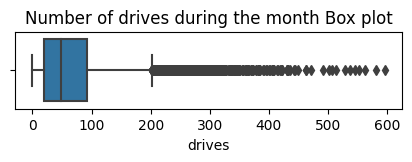

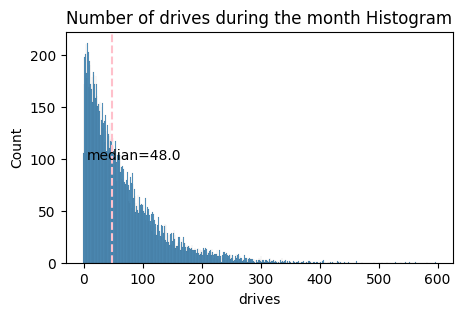

In [10]:
# Box plot for driving_days
plt.figure(figsize=(5,1))
g = sns.boxplot(data=df, 
            x='drives');
plt.title('Number of drives during the month Box plot')
plt.show()
# Histogram
plt.figure(figsize=(5,3));
ax = sns.histplot(x=df['drives'],discrete=True)
plt.title('Number of drives during the month Histogram')
median = df['drives'].median()
plt.axvline(median, color='pink', linestyle='--')
plt.text(5,100, 'median='+str(median), color='black')
plt.show();

Number of days  = Uniform distribution. 
However, drives is rightly skewed.  

'device' variable has two possible values = 'iPhone' and 'Android'. Categorical variable.
iPhone = 1, Android = 2

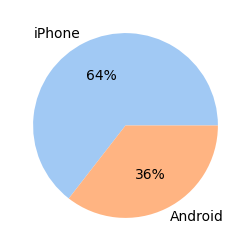

In [11]:
#categorical variable - change it to 1 or 2
device_list = {'iPhone','Android'}
set(df['device']) - set(device_list)
#set difference is 0 - so all rows have correct values
replacement_dict={'iPhone':1, 'Android':2}
# 2. Create another column for device number - Use this to create a pie chart
df['device_number']=df['device'].replace(replacement_dict)
# Pie chart
plt.figure(figsize=(3,3))
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
# plotting data on chart
plt.pie(df['device_number'].value_counts(), labels=replacement_dict.keys(), colors=palette_color, autopct='%.0f%%')
# displaying chart
plt.show()

Iphone Users ~64% - almost twice in number as Android users (36%)

Similarly the 'label' variable - 'retained' or 'churned' Categorical variable. 
'churned' = 1; 'retained' = 0

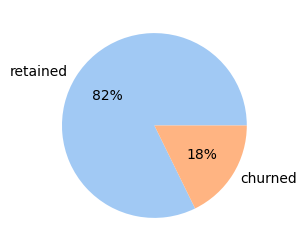

In [12]:
# Pie chart
#categorical variable - change it to 1 or 2
label_set = {'retained','churned'}
set(df['label']) - set(label_set)
#set difference is 0 - so all rows have correct values
replacement_dict={'retained':1, 'churned':0}
# 2. Create another column for device number - Use this to create a pie chart
df['label_number']=df['label'].replace(replacement_dict)
df.head()
# Pie chart
plt.figure(figsize=(3,3))
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df['label_number'].value_counts(), labels=replacement_dict.keys(), colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

82% retained. 18% churned.

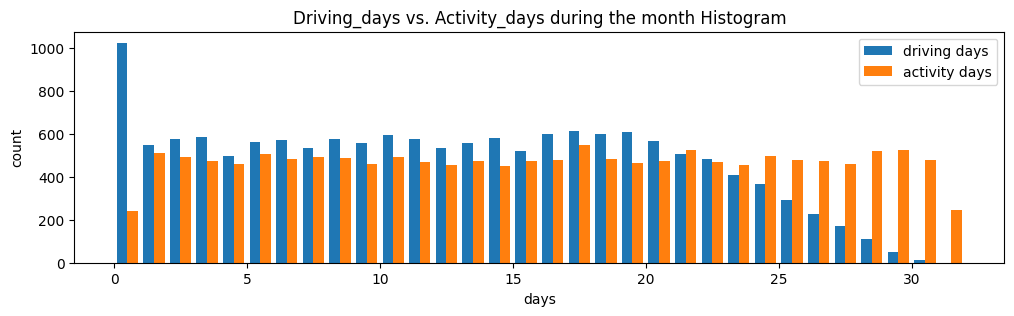

In [13]:
#comparing driving_days vs activity_days Histogram 
# Histogram
plt.figure(figsize=(12,3));
labels =['driving days', 'activity days']
plt.hist([df['driving_days'],df['activity_days']],bins=range(0,33),label=labels)
plt.title('Driving_days vs. Activity_days during the month Histogram')
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.show();


- People are opening the app (activity_days) but not using it during driving (driving_days)
- Also, number of activity_days(>30) > number of driving_days for the same month? Some issue with the data?

In [14]:
max_driving_days = df['driving_days'].max()
print('MAX Driving Days ' + str(max_driving_days))
activity_days = df['activity_days'].max()
print('MAX Activity Days ' + str(activity_days))

MAX Driving Days 30
MAX Activity Days 31


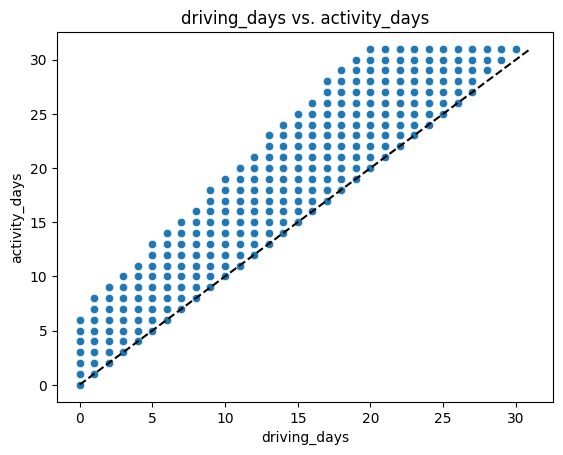

In [15]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='black', linestyle='--');
plt.show()


Number of driving_days < Number of activity_days. 

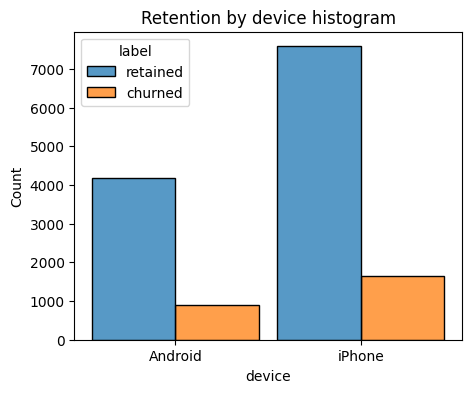

In [16]:
# Histogram for Retention By Device 
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

Android (churn vs retained) is similar to iPhone (churn vs retained)

In [17]:
#1. Create `km_per_driving_day` column
df['km_per_driving_day']=df['driven_km_drives']/df['driving_days']
# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

NaN and inf values -  mean / max / std 
Need to modify the dataset to fix these values.

In [18]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

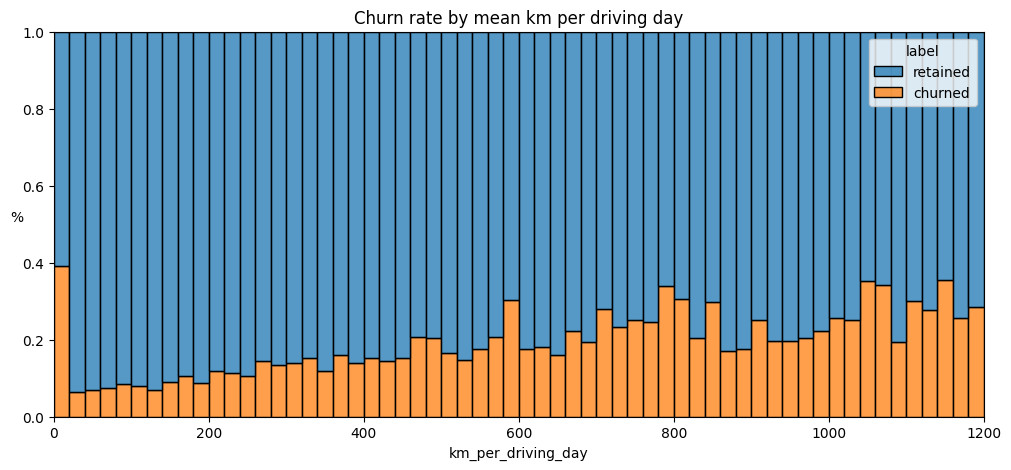

In [19]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),#1201 size of the bin limits the km per driving day > 1200
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases meaning
Long-distance users tend to discontinue using the app.


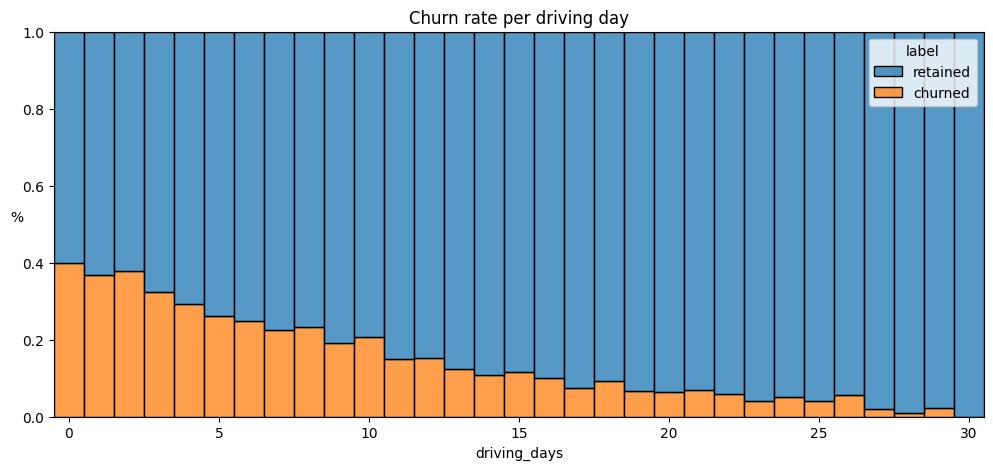

In [20]:
# Histogram for driving_days vs Churn rate
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32,2),
             hue='label',
             multiple='fill',
            discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The more the people used the app while driving, less they churned. 

In [21]:
# Create `professional_driver` feature 
# professional driver  is a person who drives > 15 days and has driven > 60 kms
df['professional_driver']=np.where((df['driving_days']>=15) & (df['driven_km_drives']>=60),1,0)
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_number,label_number,km_per_driving_day,professional_driver
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2,1.0,138.360267,1
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1,1.0,1246.901868,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2,1.0,382.393602,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1,1.0,304.530374,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2,1.0,219.455667,1


In [22]:
# Check count of professionals and non-professionals
df["professional_driver"].value_counts()
#check by the label
#Shows the count of non prof drivers by label (retained / churned) AND count of prof drivers by label (retained/churned)
df.groupby(by="professional_driver")["label"].value_counts()
#Show the same information as percentage pass(normalize=True) to the value_counts function
df.groupby(by="professional_driver")["label"].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.747571
                     churned     0.252429
1                    retained    0.930729
                     churned     0.069271
Name: proportion, dtype: float64

The churn rate for professional drivers is 6.9%, while the churn rate for non-professionals is 25%.

**Drop missing values**
'label' column has 700 missing values.Since the missing data is less than 5% of the total data, we need to drop the rows that are missing this data.

In [23]:
#Drop rows with missing values axis=0
df=df.dropna(subset=['label'],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14299 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14299 non-null  int64  
 3   drives                   14299 non-null  int64  
 4   total_sessions           14299 non-null  float64
 5   n_days_after_onboarding  14299 non-null  int64  
 6   total_navigations_fav1   14299 non-null  int64  
 7   total_navigations_fav2   14299 non-null  int64  
 8   driven_km_drives         14299 non-null  float64
 9   duration_minutes_drives  14299 non-null  float64
 10  activity_days            14299 non-null  int64  
 11  driving_days             14299 non-null  int64  
 12  device                   14299 non-null  object 
 13  device_number            14299 non-null  int64  
 14  label_number             14

In [24]:
# Create binary `label2` column
df["label2"]=np.where((df["label"]=='retained'), 0,1)
df["label2"].value_counts()

label2
0    11763
1     2536
Name: count, dtype: int64

In [25]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df['device2'].value_counts()

device2
1    9225
0    5074
Name: count, dtype: int64

#DataFrame for Tree Models. 

In [26]:
df1=df.copy()

In [27]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

The following are the assumptions for logistic regression:
* Independent observations (This refers to how the data was collected.)
* No extreme outliers - Took care of that through imputing
* Little to no multicollinearity among X predictors - 
* Linear relationship between X and the **logit** of y

Check the correlation among predictor variables. First, generate a correlation matrix.


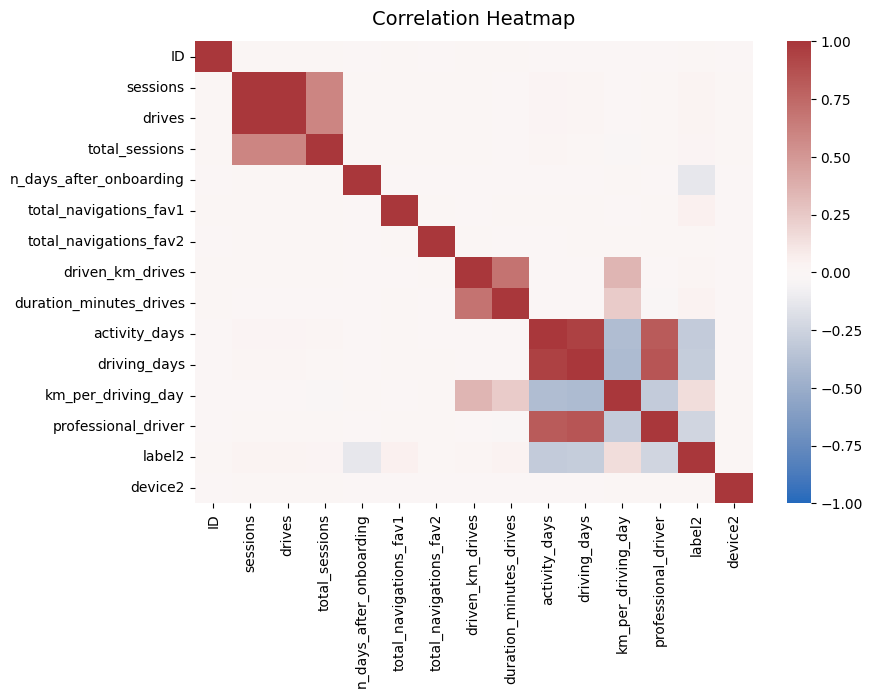

In [28]:
# Generate a correlation matrix
df = df.drop(columns=['label','device', 'device_number', 'label_number'], axis=1)
plt.figure(figsize=(9, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=False, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

plt.show();

Strong correlation between 
- Total Sessions - Sessions, Drives
- sessions and drives: 1.0
- driving_days and activity_days: 0.95

In [29]:
# Isolate predictor variables
X = df.drop(columns = [ 'ID','label2', 'sessions','driving_days'])
# ['label', 'label2', 'device', 'sessions', 'driving_days'])
# Isolate target variable
y=df["label2"]

In [30]:
X.describe()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,581.942399,0.409889,0.645150
std,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,1038.254509,0.491830,0.478485
min,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,136.168003,0.000000,0.000000
50%,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,273.301012,0.000000,1.000000
75%,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,558.018761,1.000000,1.000000
max,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,15420.234110,1.000000,1.000000


# Logistic Regression Model

In [31]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)


In [32]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
14856,27,136.343958,1771,4,0,3221.389287,2121.499575,27,169.546805,1,0
7054,108,270.075038,1435,422,0,4945.684532,1484.348106,10,618.210567,0,1
14587,82,199.305743,393,324,105,2692.758040,697.055702,16,192.339860,0,1
6693,52,267.417571,303,97,1,3249.284264,1898.107018,8,406.160533,0,0
3390,40,111.953141,3220,164,0,2354.134277,1656.119327,11,235.413428,0,1


In [33]:
model = LogisticRegression(penalty=None, max_iter=400).fit(X_train,y_train)

In [34]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.002190
total_sessions             0.000363
n_days_after_onboarding   -0.000410
total_navigations_fav1     0.001179
total_navigations_fav2     0.000831
driven_km_drives          -0.000019
duration_minutes_drives    0.000115
activity_days             -0.106227
km_per_driving_day         0.000017
professional_driver       -0.004027
device2                   -0.001106
dtype: float64

In [35]:
model.intercept_[0]

-0.0017465567294085462

In [36]:
#Get the predicted probabilities of the training data
training_probabilities=model.predict_proba(X_train)
training_probabilities

array([[0.9644146 , 0.0355854 ],
       [0.67528121, 0.32471879],
       [0.75196261, 0.24803739],
       ...,
       [0.91867266, 0.08132734],
       [0.85442558, 0.14557442],
       [0.9323817 , 0.0676183 ]])

In [37]:
#Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

In [38]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()
# 2. Create a new `logit` column in the `logit_data` df
logit_data["logit"]=[np.log(prob[1] / prob[0]) for prob in training_probabilities]

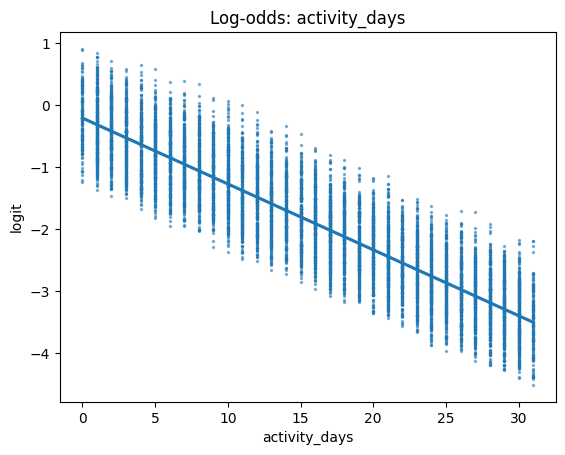

In [39]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

In [40]:
# Generate predictions on X_test
# Save predictions
y_pred = model.predict(X_test)

In [41]:
# Score the model (accuracy) on the test data
model.score(X_test,y_test)

0.8247510065691884

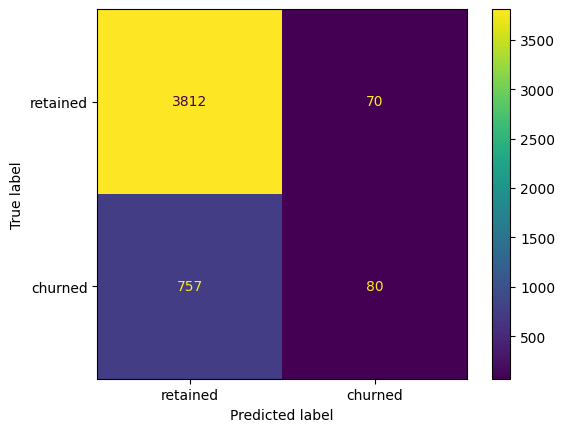

In [42]:
# Calculate the values for each quadrant in the confusion matrix
# Import the metrics module from scikit-learn
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
dispcm = metrics.ConfusionMatrixDisplay(cm,display_labels=['retained', 'churned'],)
dispcm.plot()

In [43]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
print(str(precision))
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
print(str(recall))

0.5333333333333333
0.0955794504181601


In [44]:
# Create a classification report
target_labels = ['retained', 'churned']
print(metrics.classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      3882
     churned       0.53      0.10      0.16       837

    accuracy                           0.82      4719
   macro avg       0.68      0.54      0.53      4719
weighted avg       0.78      0.82      0.77      4719



The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

# TREE BASED MODELS
**Outliers**
Tree-based models are resilient to outliers, so there is no need to make any imputations.

**Feature selection**
Drop `ID` from the `df` dataframe.

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14299 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14299 non-null  int64  
 3   drives                   14299 non-null  int64  
 4   total_sessions           14299 non-null  float64
 5   n_days_after_onboarding  14299 non-null  int64  
 6   total_navigations_fav1   14299 non-null  int64  
 7   total_navigations_fav2   14299 non-null  int64  
 8   driven_km_drives         14299 non-null  float64
 9   duration_minutes_drives  14299 non-null  float64
 10  activity_days            14299 non-null  int64  
 11  driving_days             14299 non-null  int64  
 12  device                   14299 non-null  object 
 13  device_number            14299 non-null  int64  
 14  label_number             14

In [46]:
df=df1.copy()
df=df.drop(columns=[ 'ID','label_number','label','device'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sessions                 14299 non-null  int64  
 1   drives                   14299 non-null  int64  
 2   total_sessions           14299 non-null  float64
 3   n_days_after_onboarding  14299 non-null  int64  
 4   total_navigations_fav1   14299 non-null  int64  
 5   total_navigations_fav2   14299 non-null  int64  
 6   driven_km_drives         14299 non-null  float64
 7   duration_minutes_drives  14299 non-null  float64
 8   activity_days            14299 non-null  int64  
 9   driving_days             14299 non-null  int64  
 10  device_number            14299 non-null  int64  
 11  km_per_driving_day       14299 non-null  float64
 12  professional_driver      14299 non-null  int64  
 13  label2                   14299 non-null  int64  
 14  device2                  14

**Data Split**

1. Define a variable `X` that isolates the features. 
2. Define a variable `y` that isolates the target variable (`label2`).
3. Split the data 80/20 into an interim training set and a test set. Stratify the splits, Random state to 42.
4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. 

In [47]:
# 1. Isolate X variables
X = df.copy()
X = X.drop(columns=[ 'label2'], axis=1)
# 2. Isolate y variable
y=df['label2']
# 3. Split into train and test sets
X_intertrain, X_test, y_intertrain, y_test = train_test_split(X, y,stratify=y,
                                                    test_size=0.20,
                                                    random_state=42)
# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_intertrain, y_intertrain,stratify=y_intertrain, 
                                                    test_size=0.25, 
                                                    random_state=42)

Verify the number of samples in the partitioned data.

In [48]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8579
2860
2860


In [49]:
y_train.describe()

count    8579.000000
mean        0.177410
std         0.382038
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label2, dtype: float64

### Modeling

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.
1. Instantiate the random forest classifier `rf` and set the random state.
2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. 
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`
3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).
4. Instantiate the `GridSearchCV` object `rf_cv`.Arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds  (`cv=_`)
 - refit: indicate which evaluation metric to use to select the model (`refit=_`)
 `refit` should be set to `'recall'`.<font/>

In [50]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth':[None],
             'n_estimators':[300],
             'min_samples_leaf': [2],
             'min_samples_split':[2],
             'max_features':[1.0],
             'max_samples':[1.0]}

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, error_score='raise',cv=4, refit='recall')

In [51]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 1min 31s, sys: 66.9 ms, total: 1min 32s
Wall time: 1min 32s


GridSearchCV(cv=4, error_score='raise',
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'accuracy', 'recall', 'f1'})

In [52]:
# Examine best score
rf_cv.best_score_

0.13795413731178338

Examine the best combination of hyperparameters.

In [53]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of model.

In [54]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): Model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Pass the `GridSearch` object to the `make_results()` function.

In [55]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.490747,0.137954,0.21519,0.821774


#### **XGBoost**

 Try to improve the scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds (`cv=_`)
 - refit: indicate which evaluation metric to use to select the model (`refit='recall'`)

In [56]:
# 1. Instantiate the XGBoost classifier
xgb=XGBClassifier()
# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }
# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

Now fit the model to the `X_train` and `y_train` data.

In [57]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 7min 20s, sys: 5.23 s, total: 7min 25s
Wall time: 1min 53s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'accuracy', 'recall', 'f1'})

Get the best score from this model.

In [58]:
# Best score and Best Parameters
xgb_cv.best_score_
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of model.

In [59]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.490747,0.137954,0.215190,0.821774
0,XGB cv,0.408463,0.172137,0.242131,0.808836


This model fit the data  better than the random forest model. 

**Model selection**
Use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

**Random forest**

In [60]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [61]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Model Name named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for  model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [62]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.490747,0.137954,0.215190,0.821774
0,XGB cv,0.408463,0.172137,0.242131,0.808836
0,RF val,0.428571,0.136095,0.206587,0.814685


**XGBoost**

In [63]:
# Use XGBoost model to predict on validation data
xgb_val_preds=xgb_cv.best_estimator_.predict(X_val)
# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val',xgb_val_preds, y_val)
# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.490747,0.137954,0.215190,0.821774
0,XGB cv,0.408463,0.172137,0.242131,0.808836
0,RF val,0.428571,0.136095,0.206587,0.814685
0,XGB val,0.399103,0.175542,0.243836,0.806993


XGB validation scores are the better than the rest. XGB is the best model or the champion model.

**Use champion model to predict on test data**

In [64]:
# Use XGBoost model to predict on test data
xgb_test_preds=xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test',xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.490747,0.137954,0.215190,0.821774
0,XGB cv,0.408463,0.172137,0.242131,0.808836
0,RF val,0.428571,0.136095,0.206587,0.814685
0,XGB val,0.399103,0.175542,0.243836,0.806993
0,XGB test,0.407895,0.183432,0.253061,0.808042


**Confusion matrix**
Plot a confusion matrix of the champion model's predictions on the test data.

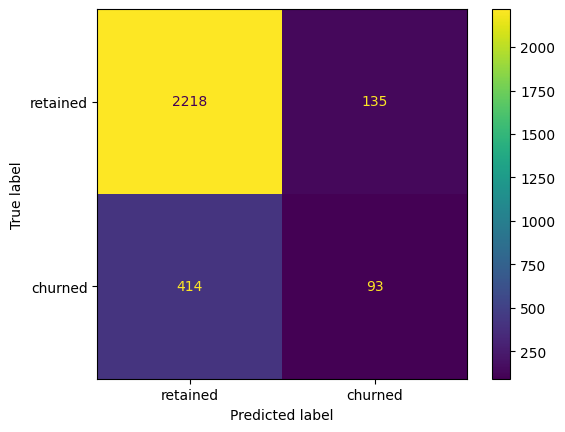

In [65]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Create the display for confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['retained', 'churned'])

# Plot the visual in-line.
disp.plot()


The model predicted three times as many false negatives than it did false positives, and it correctly identified only 16.6% of the users who actually churned.

**Feature importance**
Use the `plot_importance` function to inspect the most important features of the final model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

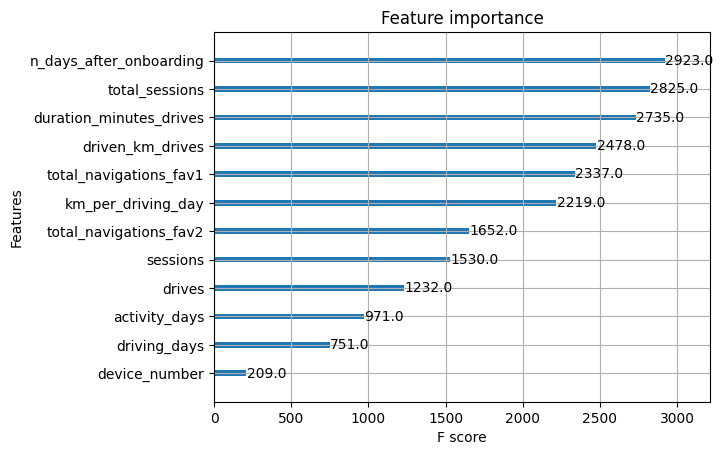

In [66]:
plot_importance(xgb_cv.best_estimator_)

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

**Conclusion**
**Questions:**

1. Would you recommend using this model for churn prediction? Why or why not?
Due to the low recall score, the model is not good to make important business choices. However, if the model is used to explore ideas, it can be helpful.

2. What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?
Dividing the data into three parts means we have less data for training compared to splitting it into just two parts. But, when we choose the best model or champion model using the validation set and then test it on a separate test set, we get a better idea of how well the model will perform in the future. This is better than splitting the data into two parts and picking the best model based on how it performs on the test data.

3. What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?
Logistic regression models are simpler to understand. They do this by assigning values to predictor variables, showing which factors had the most impact on their predictions and whether they were positively or negatively related to the final prediction.

4. What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?
Tree based models are easier to work with as they require less data cleaning (no Imputation) and making less assumptions. However, they do take more resources and time to run. Tree based models make better predictions.

5. What could you do to improve this model?
In this model, more than half of the top 10 most influential features were ones we engineered. It may also be beneficial to rebuild the model using various combinations of predictor variables to eliminate unhelpful features and reduce noise.

6. What additional features would you like to have to help improve the model?
Having detailed data about each user's drives, like travel times and locations, would be quite beneficial.

**Identify an optimal decision threshold**
A precision-recall curve can help to visualize the trade-off between the model's precision and recall.
Here's the precision-recall curve for the XGBoost champion model on the test data.

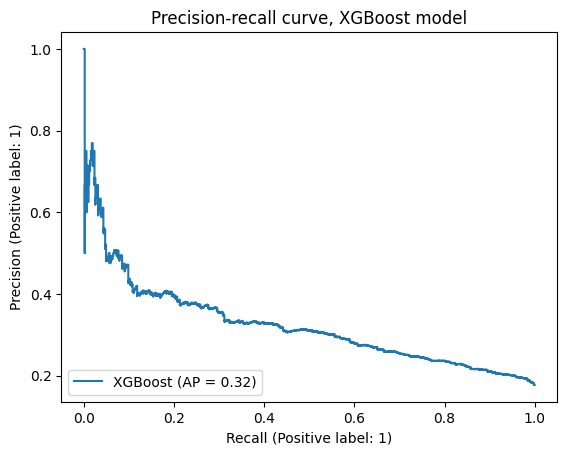

In [67]:
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model');

As recall increases, precision decreases.

In [68]:
# Get predicted probabilities on the test data
predicted_probabilities = xgb_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[0.9863293 , 0.01367066],
       [0.75418025, 0.24581973],
       [0.99239063, 0.00760938],
       ...,
       [0.7743261 , 0.22567391],
       [0.9909981 , 0.00900188],
       [0.7437577 , 0.25624225]], dtype=float32)

The `predict_proba()` method returns a 2-D array of probabilities where each row represents a user. The first number in the row is the probability of belonging to the negative class, the second number in the row is the probability of belonging to the positive class.

In [69]:
# Create a list of just the second column values (probability of target)
probs = [x[1] for x in predicted_probabilities]

# Create an array of new predictions that assigns a 1 to any value >= 0.4
new_preds = np.array([1 if x >= 0.4 else 0 for x in probs])
new_preds

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
# Get evaluation metrics for when the threshold is 0.4
get_test_scores('XGB, threshold = 0.4', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.4",0.377644,0.246548,0.298329,0.794406


Compare these numbers with the results from earlier.

In [71]:
results

,model,precision,recall,F1,accuracy
0,RF cv,0.490747,0.137954,0.215190,0.821774
0,XGB cv,0.408463,0.172137,0.242131,0.808836
0,RF val,0.428571,0.136095,0.206587,0.814685
0,XGB val,0.399103,0.175542,0.243836,0.806993
0,XGB test,0.407895,0.183432,0.253061,0.808042


In [72]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that the model has

    Outputs:
        threshold: The threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


Now, test the function to find the threshold that results in a recall score closest to 0.5.

In [73]:
# Get the predicted probabilities from the champion model
probabilities = xgb_cv.best_estimator_.predict_proba(X_test)

# Call the function
threshold_finder(y_test, probabilities, 0.5)

(0.138, 0.5009861932938856)

Setting a threshold of 0.124 will result in a recall of 0.503.

In [74]:
# Create an array of new predictions that assigns a 1 to any value >= 0.124
probs = [x[1] for x in probabilities]
new_preds = np.array([1 if x >= 0.124 else 0 for x in probs])

# Get evaluation metrics for when the threshold is 0.124
get_test_scores('XGB, threshold = 0.124', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.124",0.305459,0.518738,0.384503,0.705594
